# Feature Engineering

Create new features or transforming your existing features to get the most of out data

#### Create New Features

- Length of text field
- Percentage od characters that are punctuation in the text
- Percentage of characters that are capitalized.

#### Transformations

- Power transformation (square, square root, etc.)
- Standardizing data (Log-transformed, etc.)

## Feature Creation for the SMS example



In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 100)

data = pd.read_csv("../dataset/SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length

In [3]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


### Create feature of percentage of text that is punctuation

In [4]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3) * 100.0

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

In [5]:
data

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4
...,...,...,...,...
5562,spam,This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy...,131,6.1
5563,ham,Will ü b going to esplanade fr home?,29,3.4
5564,ham,"Pity, * was in mood for that. So...any other suggestions?",48,14.6
5565,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week ...,100,1.0


### Evaluate created features

In [9]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

/home/chuong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chuong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


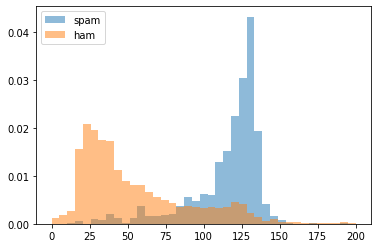

In [16]:
bins = np.linspace(0, 200, 40)

pyplot.hist(data[data['label'] == 'spam']['body_len'], bins, alpha = 0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['body_len'], bins, alpha = 0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

/home/chuong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chuong/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


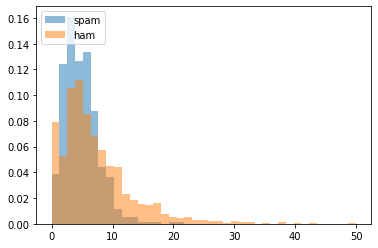

In [17]:
bins = np.linspace(0, 50, 40)

pyplot.hist(data[data['label'] == 'spam']['punct%'], bins, alpha = 0.5, normed=True, label='spam')
pyplot.hist(data[data['label'] == 'ham']['punct%'], bins, alpha = 0.5, normed=True, label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

### Box-cow Power Transfomation

> Process that alters each data point in a certain column in a systematic way

#### Transformation process

1. Determine what range of exponents to test.

2. Apply each transformation to each value of your chosen feature

3. Use some criteria to determine which of the transformations yields the best distribution

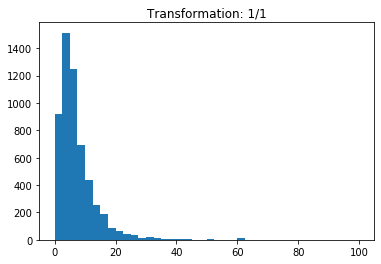

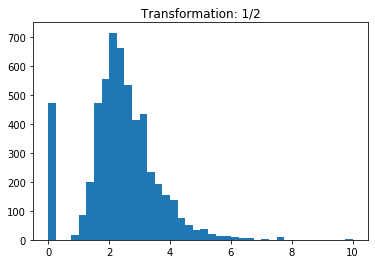

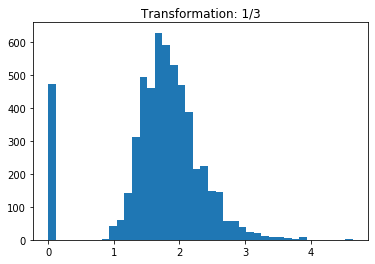

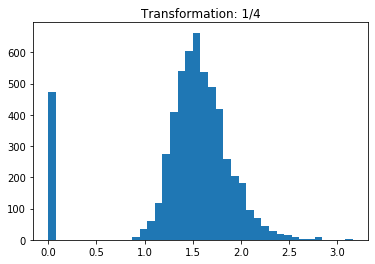

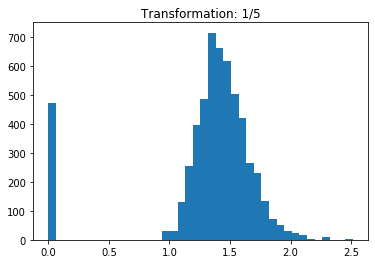

In [18]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punct%'])** (1/i), bins = 40)
    
    pyplot.title(f"Transformation: 1/{i}")
    pyplot.show()